#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [ ]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIME


In [ ]:
#read specific columns from CSV file 
col_list = ["user_uuid", "timestamp","type","pressure"]
df_event = pd.read_csv("CSV/event.csv", usecols=col_list)
df_event.head(10)

,type,timestamp,user_uuid,pressure
0,TOUCH_DOWN,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824
1,TOUCH_UP,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824
2,CONTENT_CHANGE,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN
3,TOUCH_DOWN,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529
4,TOUCH_UP,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529
5,CONTENT_CHANGE,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN
6,CONTENT_CHANGE,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN
7,TOUCH_DOWN,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471
8,TOUCH_UP,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471
9,CONTENT_CHANGE,1.612260e+12,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN


In [ ]:
#convert epoc time to normal time
df_event['timestamp']=pd.to_datetime(df_event['timestamp'],unit='ms')
#df_event.describe
df_event
#df_event.timestamp.dtype

,type,timestamp,user_uuid,pressure
0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824
1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824
2,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN
3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529
4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529
...,...,...,...,...
784287,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099
784288,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099
784289,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.030525
784290,TOUCH_UP,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.030525


In [ ]:
#Add a new column 'event_date' by extracting date from timstamp 
df_event['event_date']=pd.to_datetime(df_event['timestamp']).dt.strftime('%Y-%m-%d')
df_event.head(10)

,type,timestamp,user_uuid,pressure,event_date
0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,2021-02-02
1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,2021-02-02
2,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02
3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2021-02-02
4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2021-02-02
5,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02
6,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02
7,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,2021-02-02
8,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,2021-02-02
9,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02


In [ ]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [ ]:
#rename column name 'type' to 'event_type' 
df_event.rename(columns = {'type' :'event_type'}, inplace = True)
df_event.head(10)

,event_type,timestamp,user_uuid,pressure,event_date
0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,2021-02-02
1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,2021-02-02
2,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02
3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2021-02-02
4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2021-02-02
5,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02
6,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02
7,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,2021-02-02
8,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,2021-02-02
9,CONTENT_CHANGE,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,NaN,2021-02-02


In [ ]:
#remove the rows with pressure=0
df_event=df_event.query('pressure>0')
df_event

,event_type,timestamp,user_uuid,pressure,event_date
0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,2021-02-02
1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,2021-02-02
3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2021-02-02
4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2021-02-02
7,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,2021-02-02
...,...,...,...,...,...
784286,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099,2021-05-25
784287,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099,2021-05-25
784288,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099,2021-05-25
784289,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.030525,2021-05-25


In [ ]:
# resetting the DatFrame index
df_event = df_event.reset_index()
df_event

,index,event_type,timestamp,user_uuid,pressure
0,0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824
1,1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824
2,3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529
3,4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529
4,7,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471
...,...,...,...,...,...
634281,784286,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099
634282,784287,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099
634283,784288,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099
634284,784289,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.030525


In [ ]:
#to check for NaN under a single DataFrame column:
df_event['pressure'].isnull().values.any()


False

In [ ]:
#to check for NaN under a entire DataFrame columns:
df_event.isnull().values.any()

False

In [ ]:
#total no of touch_down events
touch_down_cnt=df_event.event_type.value_counts().TOUCH_DOWN
touch_down_cnt

133737

In [ ]:
#Add event_id to each group based on touch_down events.Because touch_down means event begins
df_event['event_id']=0
touch_down_cnt=0;
for i in range(len(df_event)) :
   if (df_event.loc[i,'event_type']=="TOUCH_DOWN"):
     touch_down_cnt+= 1  
         #print(touch_down_cnt)    
   df_event.loc[i,'event_id']=touch_down_cnt 

In [ ]:
df_event.head(10)

,index,event_type,timestamp,user_uuid,pressure,event_id
0,0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,1
1,1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,1
2,3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2
3,4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2
4,7,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,3
5,8,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,3
6,10,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.529412,4
7,11,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.529412,4
8,13,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.549020,5
9,14,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.549020,5


In [ ]:
#to find unique event type
df_event.event_type.unique()

array(['TOUCH_DOWN', 'TOUCH_UP', 'TOUCH_MOVE'], dtype=object)

In [ ]:
#to find unique event id
df_event.event_id.unique()

array([     1,      2,      3, ..., 133735, 133736, 133737])

In [ ]:
df_event.event_id.dtype

dtype('int64')

In [ ]:
#write the dataframe 'df_event' as pickle file
write_pickle(df_event,'df_event.p')

Start Pickle Load time: 2021-06-04 20:50:41.323697
End Pickle Load time: 2021-06-04 20:50:41.649220   Duration:0:00:00.325523


In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event.p')
df_event

Start Pickle Load time: 2021-06-05 08:52:01.252284
End Pickle Load time: 2021-06-05 08:52:02.418426   Duration:0:00:01.166142


,index,event_type,timestamp,user_uuid,pressure,event_id,event_date
0,0,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,1,2021-02-02
1,1,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.458824,1,2021-02-02
2,3,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2,2021-02-02
3,4,TOUCH_UP,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.423529,2,2021-02-02
4,7,TOUCH_DOWN,2021-02-02 10:00:00,f783f4de-9669-4f78-b765-b9f0d3e68b02,0.376471,3,2021-02-02
...,...,...,...,...,...,...,...
634281,784286,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099,133737,2021-05-25
634282,784287,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099,133737,2021-05-25
634283,784288,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.101099,133737,2021-05-25
634284,784289,TOUCH_MOVE,2021-05-25 16:26:40,46952d51-25ad-405a-ac11-a22a624ae6b5,0.030525,133737,2021-05-25


**create new df**

In [ ]:
#Aggregate different functions over the columns and rename the index of the resulting DataFrame.
df_event_new=df_event.groupby(['event_id','user_uuid']).agg(start_timestamp=('timestamp',max),end_timestamp=('timestamp',min),avg_pressure=('pressure',np.mean),event_date=('event_date',min)).reset_index()
df_event_new

,event_id,user_uuid,start_timestamp,end_timestamp,avg_pressure,event_date
0,1,f783f4de-9669-4f78-b765-b9f0d3e68b02,2021-02-02 10:00:00,2021-02-02 10:00:00,0.458824,2021-02-02
1,2,f783f4de-9669-4f78-b765-b9f0d3e68b02,2021-02-02 10:00:00,2021-02-02 10:00:00,0.423529,2021-02-02
2,3,f783f4de-9669-4f78-b765-b9f0d3e68b02,2021-02-02 10:00:00,2021-02-02 10:00:00,0.376471,2021-02-02
3,4,f783f4de-9669-4f78-b765-b9f0d3e68b02,2021-02-02 10:00:00,2021-02-02 10:00:00,0.529412,2021-02-02
4,5,f783f4de-9669-4f78-b765-b9f0d3e68b02,2021-02-02 10:00:00,2021-02-02 10:00:00,0.549020,2021-02-02
...,...,...,...,...,...,...
133855,133733,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-05-25 16:26:40,2021-05-25 16:26:40,0.040391,2021-05-25
133856,133734,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-05-25 16:26:40,2021-05-25 16:26:40,0.043040,2021-05-25
133857,133735,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-05-25 16:26:40,2021-05-25 16:26:40,0.040147,2021-05-25
133858,133736,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-05-25 16:26:40,2021-05-25 16:26:40,0.062466,2021-05-25


In [ ]:
#here we add extra coulmns as username by assigning username for each user_uuid
#create series of unique user ids
user_ids=df_event_new['user_uuid'].drop_duplicates().sort_values().reset_index(drop=True)
uname=['user1','user2','user3','user4','user5','user6','user7','user8' ]
se=pd.DataFrame(uname[0:len(user_ids)])#create series with user name
se.columns=['user_name']#set index as user_name
#create df with user_uuid and user_name
df_uname=pd.concat([user_ids,se],axis=1)
#join dataframes such as df_uname and df_event_new
df_event_new = df_event_new.merge(df_uname,on='user_uuid',how='inner').sort_values('start_timestamp').reset_index(drop=True)
df_event_new

In [ ]:
df_uname
df_uname.to_csv('/content/drive/My Drive/Practicum/CSV/user_list.csv')

Write newly created df to pickle file

In [ ]:
#write the new dataframe in pickle
write_pickle(df_event_new,'df_event_new.p')

Start Pickle Load time: 2021-06-04 22:33:02.669961
End Pickle Load time: 2021-06-04 22:33:02.748488   Duration:0:00:00.078527


In [ ]:
#retrieve the pickle file 'df_event_new.p' 
df_event_new=read_pickle('df_event_new.p')
df_event_new

Start Pickle Load time: 2021-06-05 08:52:17.021938
End Pickle Load time: 2021-06-05 08:52:17.583922   Duration:0:00:00.561984


,event_id,user_uuid,start_timestamp,end_timestamp,avg_pressure,event_date,user_name
0,1,f783f4de-9669-4f78-b765-b9f0d3e68b02,2021-02-02 10:00:00,2021-02-02 10:00:00,0.458824,2021-02-02,user8
1,157,af62719a-abca-4aa0-a90b-c1103278133b,2021-02-02 10:00:00,2021-02-02 10:00:00,1.000000,2021-02-02,user5
2,158,af62719a-abca-4aa0-a90b-c1103278133b,2021-02-02 10:00:00,2021-02-02 10:00:00,1.000000,2021-02-02,user5
3,159,af62719a-abca-4aa0-a90b-c1103278133b,2021-02-02 10:00:00,2021-02-02 10:00:00,1.000000,2021-02-02,user5
4,160,af62719a-abca-4aa0-a90b-c1103278133b,2021-02-02 10:00:00,2021-02-02 10:00:00,1.000000,2021-02-02,user5
...,...,...,...,...,...,...,...
133855,133557,cedd3fb2-6f55-49fa-aba5-78049c59de1f,2021-05-25 16:26:40,2021-05-25 16:26:40,1.000000,2021-05-25,user6
133856,133558,cedd3fb2-6f55-49fa-aba5-78049c59de1f,2021-05-25 16:26:40,2021-05-25 16:26:40,1.000000,2021-05-25,user6
133857,133559,cedd3fb2-6f55-49fa-aba5-78049c59de1f,2021-05-25 16:26:40,2021-05-25 16:26:40,1.000000,2021-05-25,user6
133858,133561,cedd3fb2-6f55-49fa-aba5-78049c59de1f,2021-05-25 16:26:40,2021-05-25 16:26:40,1.000000,2021-05-25,user6


In [ ]:
df_event_new.to_csv('/content/drive/My Drive/Practicum/CSV/df_event_new.csv')

In [ ]:
df_event_day = df_event_new.set_index(['event_date'])

In [ ]:
#create a dataframe based on date
df_event_day=df_event_new.query('event_date=="2021-02-15"')
#df_event_day=df_event_new.query('(event_date=="2021-05-24")&(user_uuid=="46952d51-25ad-405a-ac11-a22a624ae6b5")')
#to find unique user_name
df_event_day.user_name.unique()


array(['user6', 'user4', 'user2', 'user5', 'user3'], dtype=object)

In [ ]:
#to find unique user_name
df_event_day.user_name.unique()

array(['user4', 'user3', 'user5'], dtype=object)

In [ ]:
#to find unique user_id
df_event_day.user_uuid.unique()

array(['ae80cf27-4366-412a-a8ac-c8430584bfbf',
       '840552bc-bab5-40bd-9a92-9308e5f32543',
       'af62719a-abca-4aa0-a90b-c1103278133b'], dtype=object)

**Visualisation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ax = df.plot(figsize=(9, 6), ylabel='Pressure')

# add horizontal line
ax.hlines(y=3450, xmin='2020-09-10', xmax='2020-09-17', color='purple', label='test')

ax.legend()
plt.show()

KeyError: ignored

<Figure size 576x720 with 0 Axes>

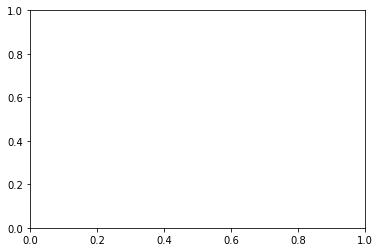

In [ ]:
# designate variables
x1 = df_event_day['start_timestamp']
x2 = df_event_day['end_timestamp']
#y = df_event_day.index.astype(np.int)
y=df_event_day['avg_pressure'].drop_duplicates().sort_values().reset_index(drop=True)
names = df_event_day['user_name'].values

labs, tickloc, col = [], [], []

# create color iterator for multi-color lines in gantt chart
color=iter(plt.cm.Dark2(np.linspace(0,1,len(y))))

plt.figure(figsize=[8,10])
fig, ax = plt.subplots()

# generate a line and line properties for each user
for i in range(len(y)):
    c=next(color)
    
    plt.hlines(i+1, x1[i], x2[i], label=y[i], color=c, linewidth=2)
    labs.append(names[i].title()+" ("+str(y[i])+")")
    tickloc.append(i+1)
    col.append(c)
plt.ylim(0,len(y)+1)
plt.yticks(tickloc, labs)

# create custom x labels
plt.xticks(np.arange(datetime(np.min(x1).year,1,1),np.max(x2)+timedelta(days=365.25),timedelta(days=365.25*5)),rotation=45)
plt.xlim(datetime(np.min(x1).year,1,1),np.max(x2)+timedelta(days=365.25))
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.grid()
plt.title('Pressure Varaition during the day')
# color y labels to match lines
gytl = plt.gca().get_yticklabels()
for i in range(len(gytl)):
    gytl[i].set_color(col[i])
plt.tight_layout()

plt.savefig(rootname+'gantt.pdf');

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
colors = { 'user1' : 'rgb(102, 153, 0)'
          , 'user2' : 'rgb(0, 204, 255)'
          , 'user3' : 'rgb(0, 51, 153)'
          , 'user4' : 'rgb(102, 0, 204)'
          , 'user5' : 'rgb(204, 0, 255)'
          , 'user6' : 'rgb(255, 0, 204)'
          , 'user7' : 'rgb(255, 0, 102)'
          , 'user8' : 'rgb(51, 255, 255)'}
    
orders = 

fig = px.timeline(df_event_day
                  , x_start="start_timestamp"
                  , x_end="end_timestamp"
                  , y="Resource"
                  , hover_name="avg_pressure"
                  , color_discrete_sequence=px.colors.qualitative.Prism
                  , category_orders={'Task':['Results of Task','Establish and agree upon Agile standards/framework','Communicate Agile structure to business groups','Select proper tooling','Results of Task','Refine analytic data use operating model','Define analytic persona\x92s and use cases','Define operational data use operating model','Define operational persona\x92s and use cases ','Define standard ','Results of Task','ID appropriate use case requirements for applying methodology (i.e. what are expectations from the business, what are deliverable expectations etc.)',
                                     'Create template for data use stories (i.e. data sets, data presentation, data analysis, Data validation, advanced analytic stories)','Results of Task','Identify product advisory council attendees','Create governance model/methodology','Results of Task','ID all candidate roles and process to keep bench as opposed to OJT','ID incentive and disincentive components to manage contract','ID candidate partners for various work components','Create methodology to manage bid process and selection \x96 partner with procurement','Results of task','Define scope of project','Results of task','ID tools for self-service ties to tools/tech','Determine extent of centrally managed policy engines','What multi-tenancy restrictions should be established','Access control \x96 Tie to IT IAM strategy','Evaluate security, PHI, access restrictions','Results of task','Publish product and service catalog outlining initial build/implementation of the product or service as well as the ongoing costs','Results of task','ID standard tools for self-service','Create governance and methodology use cases','Create training protocol for tool consumption',
                                     'Database/System design for persistent data to be stored on remote, network attached storage','Identify systems requirements','Technology/vendor selection','Migration effort to be considered; layout strategy','Downstream efforts - existing processes to migrate; how to enable a seamless transition; which approach to use - coexist or turn off/turn on','Enable S3 as primary storage, move away from other storage solutions and determine config','Establish rules/processes to ensure S3 is the primary storage solution','Recompilation and redeployment of jobs is required','Stand up non-prod two node cluster job/script execution','Decommission version 5 by May 21 2021','Results of task','Identify self-service needs/requirements for each group ','Identify the right tool for the right purpose','Learning and creating guidelines on how to use new tools','Estimate adoption rate','Gauge time to ramp-up','Evaluate if migration from existing tools to new tools is required',
                                     'Results of task','Identify compatible tooling','Determine requirements specific for each business group','Identify VDI-based security issues for additional R/Python libraries','Document and communicate procedure to add new ML features/libraries to remote environments','Estimate value of paid tools vs free libraries','Determine if automated ML tools are necessary (Datarobot vs Azure ML)','Gauge level of adoption','Document FAQs and consider questions specific to each business group','Results of task','Determine scope \x96 DR, HA, Extent of insight and notification needs','Establish continuous monitoring needs aligned with DevOps','Resiliency testing approach','Monitoring tools','Incident response communication protocol (ties to governance and operating model)','Identify compatible tooling/technology','Consider location/region-based connection practices',
                                     'Consider multiple physical data center connection locations for resiliency to connectivity failures due to fiber cut, device failure or complete location failure','Determine if dynamically routed and active connections vs. statically routed for load balancing and failover','Results of task','Identify compatible tooling','Determine instance requirements specific for each business group','Launch instances and document keys/passwords','Communicate instance configurations and setup notes to each group','Estimate level of adoption','Predict and document FAQs','Document how to use Microsoft Remote Desktop Apps for Mac users','Install supporting software (R, Python, Firefox etc.)','Identify an owner/manager of compute elasticity/infrastructure operations',
                                     'Identify rules of engagement and governance for when the process is live','Results of task','Prioritize data pipelines (tie to Data COE)','Pilot analytics in data pipeline (tie to NextBlue AA COE)','Define event streaming hub approach (i.e. people process tech)','Determine appropriate/compatible event streaming tools (Apache Kafka, Hazelcast Jet etc.)','Determine streaming rate requirements specific to each business group','Map out the data flow/data architecture and associated patterns','Identify who will do the publishing framework','Deploy and document','There are dependencies on infrastructure prior to putting this in place','Results of task','Define tools/tech and associated dependencies','Align with cloud COE','Establish development guidelines','Pilot?','Tie to governance and operating model \x96 when to use how to use etc.','Determine which tasks will be microservices','Determine tools to run/containerize microservices',
                                     'Select a microservice deployment strategy (Service Instance per Host, Multiple Service Instances per Host, Service Instance per Virtual Machine etc.)','Determine if you need a cluster manager (Kubernetes, Marathon etc.)','Identify enablement approach','Results of task','Define tools/tech and associated dependencies','Align with cloud COE','Establish development guidelines','Pilot?','Tie to governance and operating model \x96 when to use how to use etc.','Determine whether to containerize existing legacy application without refactoring into microservices','Identify barriers between security and devops','Determine drawbacks: such as container infrastructure is not as mature or secure as the infrastructure for VMs (containers share the kernel of the host OS with one another)','Results of task','Identify a back-end physical infrastructure to enable digital tools','Evaluate a hybrid cloud strategy (with an eye for the worker UX)',
                                     'Evaluate existing support services for the workplace','Implement technology for a real-time, 360 view of the UX','Results of task','Orchestration and management of services, applications and data flow','Automation of business processes','Establishment of federated security and Single Sign-On','System logging and monitoring','Data analysis, reporting and predictions','Monitoring of mobile and IoT devices','Implementation of Big Data solutions','Centralized (mobile ready) web solutions for clients and employees','Scalability and high-load support','SaaS and multi-tenancy support','Centralized control of infrastructure management etc.','Results of task','Determine compatible tools','Identify downfalls of low code platforms','Estimate adoption rate',
                                     'Results of task','Determine the FHIR server architecture','Determine compatibility of servers and FHIR versions to ensure interoperability','Understand the APIs as well as the level of completion per API','Identify where to put/install the FHIR server','Estimate adoption rate','Results of task','ID priority governance model evaluation needs \x96 self-service, machine learning model productionalization, operational area use and interaction']}
                  , opacity=.7

                  , range_x=None
                  , range_y=None
                  , template='plotly_white'
                  , height=800
                  , width=1500
                  , color='Dimension'
                  , title ="<b>IE 3.0 Gantt Chart 2021</b>"
                 )

fig.update_layout(
    bargap=0.5
    ,bargroupgap=0.1
    ,xaxis_range=[df.Start.min(), df.Finish.max()]
    ,xaxis = dict(
        showgrid=True
        ,rangeslider_visible=True
        ,side ="top"
        ,tickmode = 'array'
        ,dtick="M1"
        ,tickformat="Q%q %Y \n"
        ,ticklabelmode="period"        
        ,ticks="outside"
        ,tickson="boundaries"
        ,tickwidth=.1
        ,layer='below traces'
        ,ticklen=20
        ,tickfont=dict(
            family='Old Standard TT, serif',size=24,color='gray')
        ,rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
            ,x=.37
            ,y=-.05
            ,font=dict(
                family="Arial",
                size=14,
                color="darkgray"
    )))
    
    ,yaxis = dict(
        title= ""
        ,autorange="reversed"
        ,automargin=True
#         ,anchor="free"
        ,ticklen=10
        ,showgrid=True
        ,showticklabels=True
        ,tickfont=dict(
            family='Old Standard TT, serif', size=16, color='gray'))
    
    ,legend=dict(
        orientation="h"
        ,yanchor="bottom"
        ,y=1.1
        ,title=""
        ,xanchor="right"
        ,x=1
        ,font=dict(
            family="Arial"
            ,size=14
            ,color="darkgray"))
)

fig.update_traces( #marker_color='rgb(158,202,225)'
                   marker_line_color='rgb(8,48,107)'
                  , marker_line_width=1.5, opacity=0.95)

fig.update_layout(
    title="<b>IE 3.0 Gantt Chart 2021</b>",
    xaxis_title="",
#     margin_l=400,
    yaxis_title="Initiatives",
#     legend_title="Dimension: ",
    font=dict(
        family="Arial",
        size=24,
        color="darkgray"
    )
)

# fig.show()
fig.write_html("C:/Users/maxwell.bade/Downloads/ie_3_gantt.html")
go.FigureWidget(fig)

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'base': array([datetime.datetime(2021, 3,…